In [5]:
import torch

In [9]:
print(torch.__version__)

2.3.0


In [10]:
print(torch.__version__)
print(torch.version.cuda)

2.3.0
11.8


In [11]:
torch.cuda.is_available()

True

#### 线性模型

1.准备数据集 DataSet

2.选择模型 Model

3.训练 Training

4.推理预测 infering

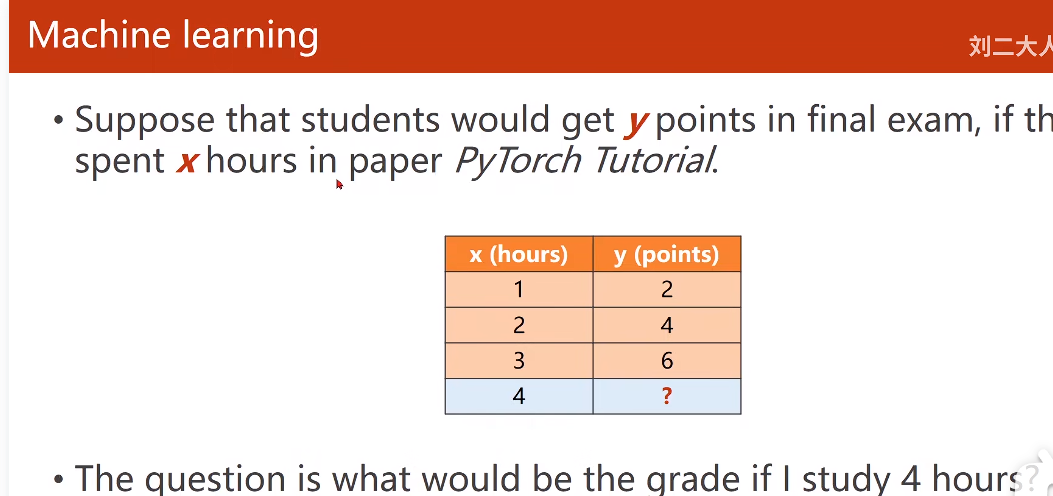

 监督学习 机器学习在学习时我们知道输入值所对应的输出值是多少

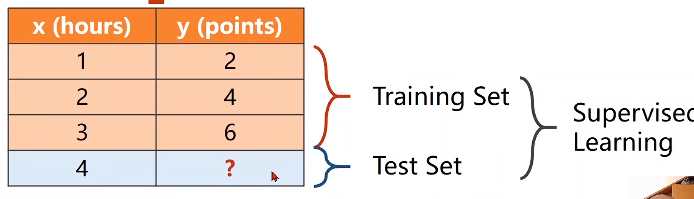

所有模型训练完 用测试集进行测试 以测试的正确率计算一些指标来看模型的优劣
在竞赛时 测试集只有输入没有输出 要用自己的模型来进行预测以评估模型优劣

若在训练集上训练的特别好 会导致过拟合情况 会把噪声也训练进来 泛化度低

有时还会把训练集分成两份-------   一份训练 另一份进行模型评估（开发集）

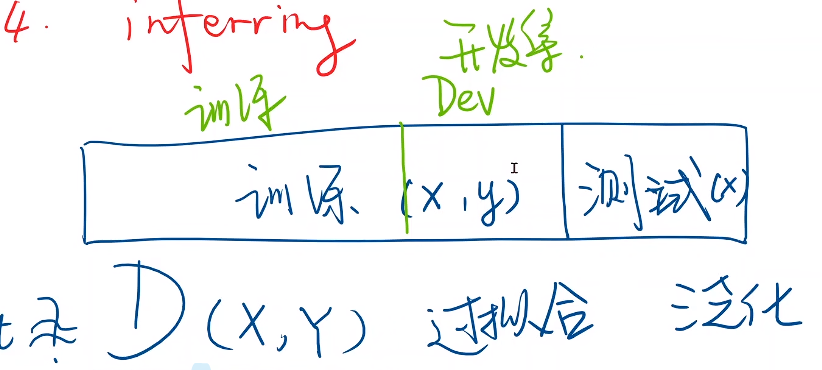

# 模型的设计

最主要是 要找到y=f（x）的函数

最常见的思路 ---先哪一个线性模型看下是否有效 --- 即 y = ax+b

令f（x） = wx + b == 》 简化后 f（x） = y_hot = x*w

主要找到w

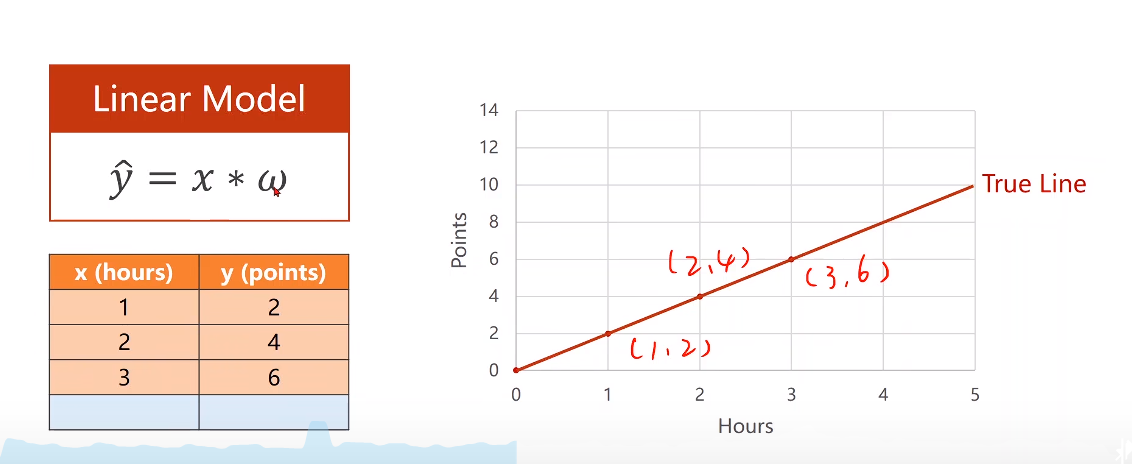

找到w 首先做一个随机猜测

对w随机猜测值进行评估 看现在的模型与真实的数据集给定的模型 偏移程度有多大

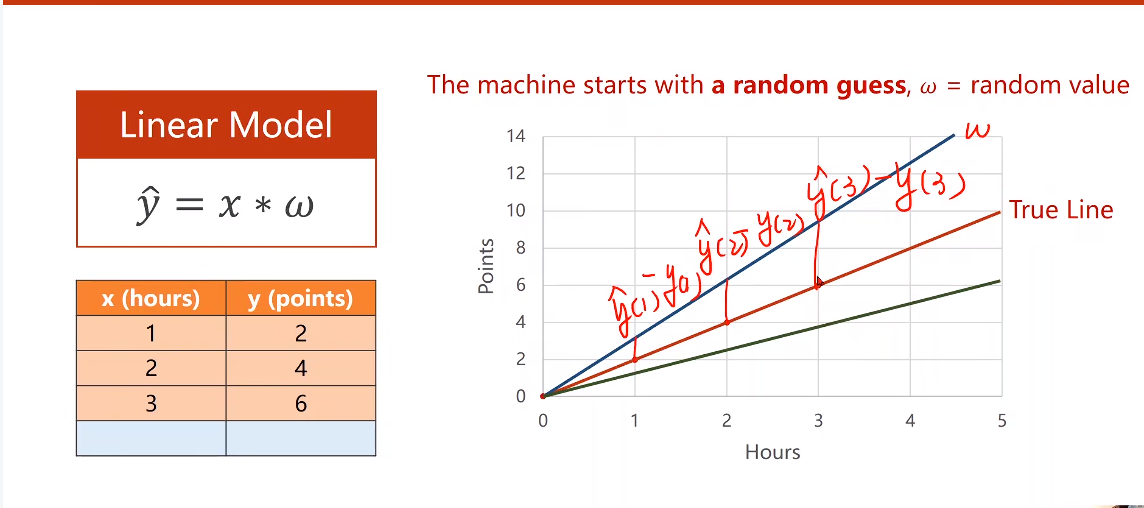

评估模型--就叫做求一个  损失函数 目标是找一个w 使平均损失降到最低

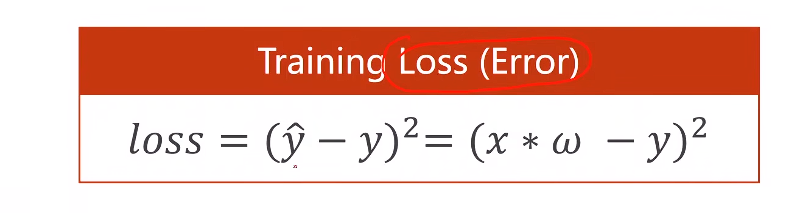

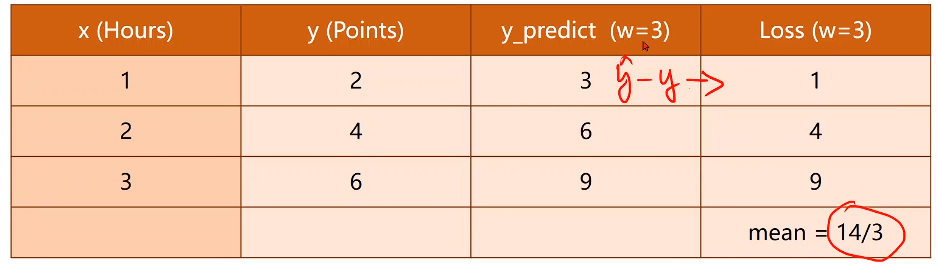

当等于w = 2时 会是0损失 但通常不可能得到  是理想状态
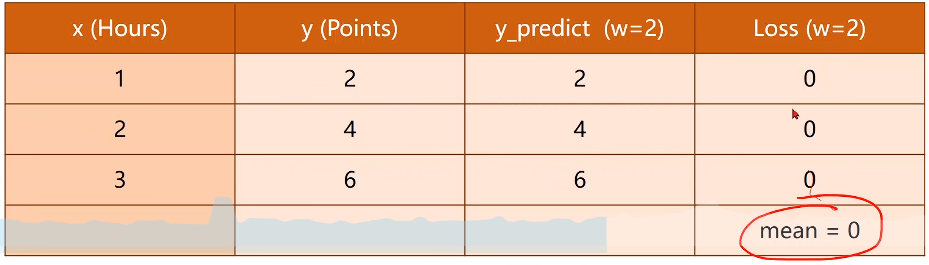

cost 即平均损失
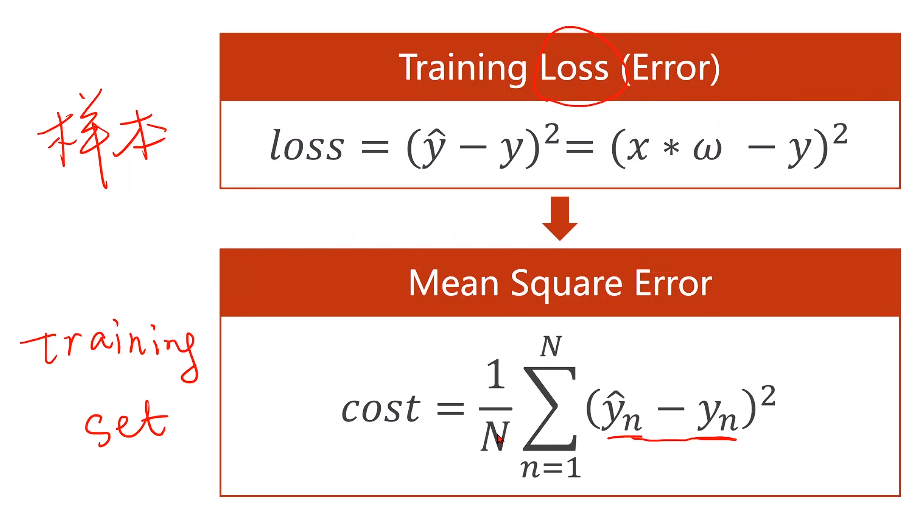

怎么找到w ==》用穷举法 w可能在0-4之间 
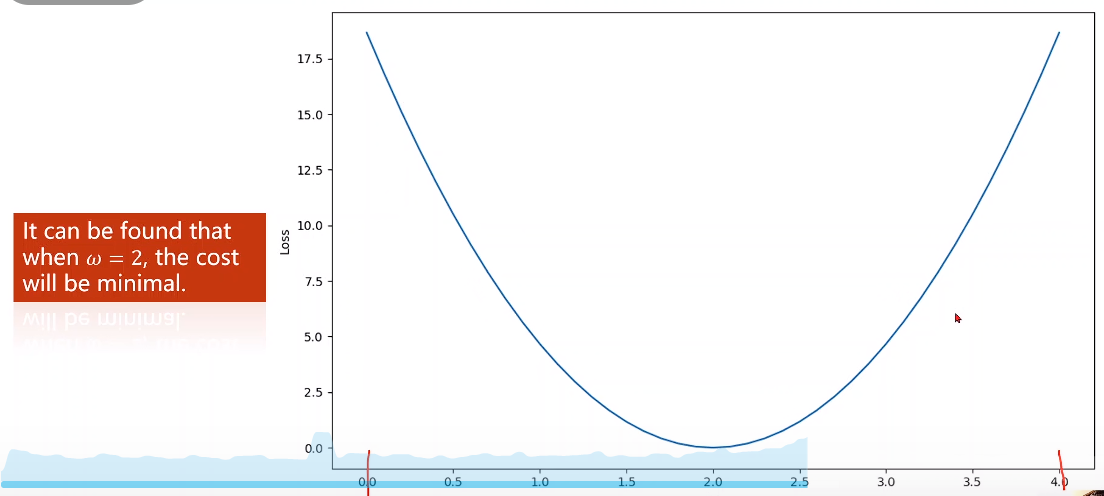

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

In [14]:
def forward(x):
    return x*w

In [15]:
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

In [16]:
w_list = []
mse_list = []

In [19]:
for w in np.arange(0.0,4.1,0.1):
    print('w = ',w)
    l_sum = 0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val,y_val)
        l_sum = l_sum + loss_val
        print('\t',x_val,y_val,y_pred_val,loss_val)
    print('MSE = ',l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

w =  0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE =  18.666666666666668
w =  0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE =  16.846666666666668
w =  0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE =  15.120000000000003
w =  0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE =  13.486666666666665
w =  0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE =  11.946666666666667
w =  0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE =  10.5
w =  0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE =  9.146666666666663
w =  0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2

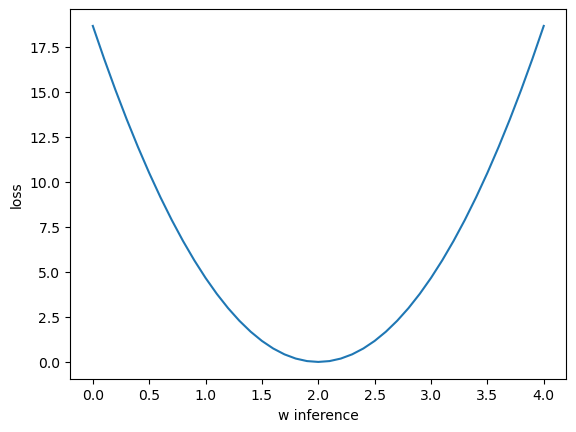

In [23]:
plt.plot(w_list,mse_list)
plt.ylabel('loss')
plt.xlabel('w inference')
plt.show()

# 作业 用y = wx+b来完成

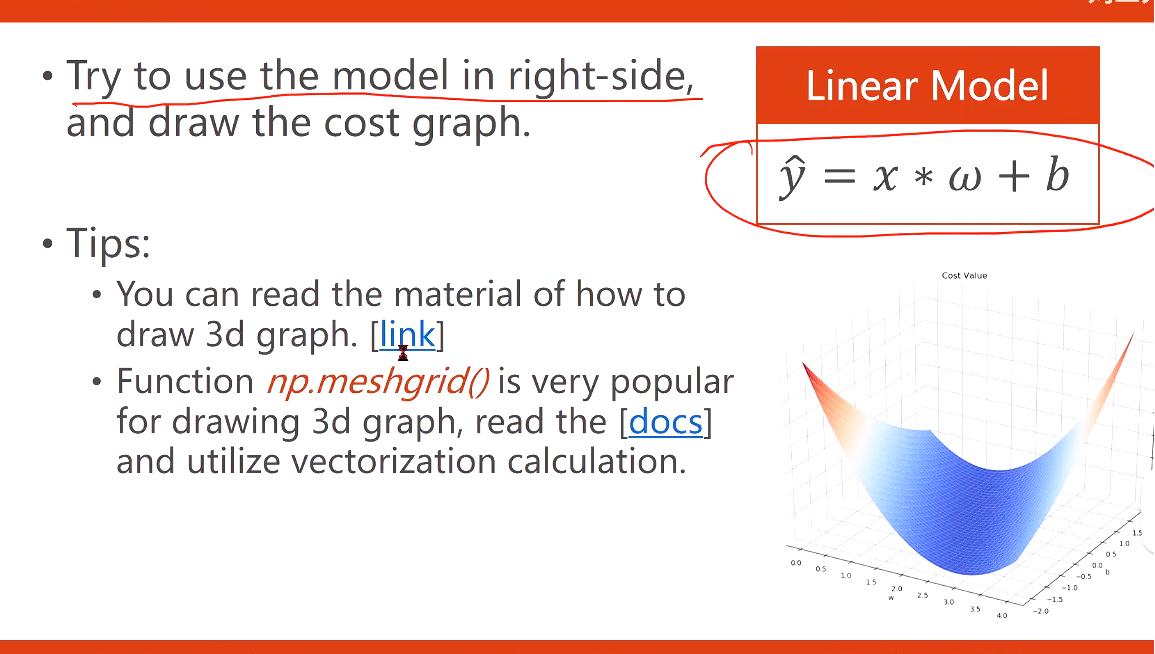

In [ ]:
w_list = []
mse_list = []
for w in np.arange(0.0,4.1,0.1):
    print('w = ',w)
    l_sum = 0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val,y_val)
        l_sum = l_sum + loss_val
        print('\t',x_val,y_val,y_pred_val,loss_val)
    print('MSE = ',l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
#y = x*3+2
x_data = [1.0,2.0,3.0]
y_data = [5.0,8.0,11.0]

In [26]:
def forward(x):
    return x * w + b

In [48]:
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

In [57]:
mse_list = []
W=np.arange(0.0,4.1,0.1)
B=np.arange(0.0,4.1,0.1)
b,w=np.meshgrid(W,B)

In [58]:
l_sum = 0
for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    print(y_pred_val)
    loss_val = loss(x_val, y_val)
    l_sum += loss_val

[[0.  0.1 0.2 ... 3.8 3.9 4. ]
 [0.1 0.2 0.3 ... 3.9 4.  4.1]
 [0.2 0.3 0.4 ... 4.  4.1 4.2]
 ...
 [3.8 3.9 4.  ... 7.6 7.7 7.8]
 [3.9 4.  4.1 ... 7.7 7.8 7.9]
 [4.  4.1 4.2 ... 7.8 7.9 8. ]]
[[ 0.   0.1  0.2 ...  3.8  3.9  4. ]
 [ 0.2  0.3  0.4 ...  4.   4.1  4.2]
 [ 0.4  0.5  0.6 ...  4.2  4.3  4.4]
 ...
 [ 7.6  7.7  7.8 ... 11.4 11.5 11.6]
 [ 7.8  7.9  8.  ... 11.6 11.7 11.8]
 [ 8.   8.1  8.2 ... 11.8 11.9 12. ]]
[[ 0.   0.1  0.2 ...  3.8  3.9  4. ]
 [ 0.3  0.4  0.5 ...  4.1  4.2  4.3]
 [ 0.6  0.7  0.8 ...  4.4  4.5  4.6]
 ...
 [11.4 11.5 11.6 ... 15.2 15.3 15.4]
 [11.7 11.8 11.9 ... 15.5 15.6 15.7]
 [12.  12.1 12.2 ... 15.8 15.9 16. ]]


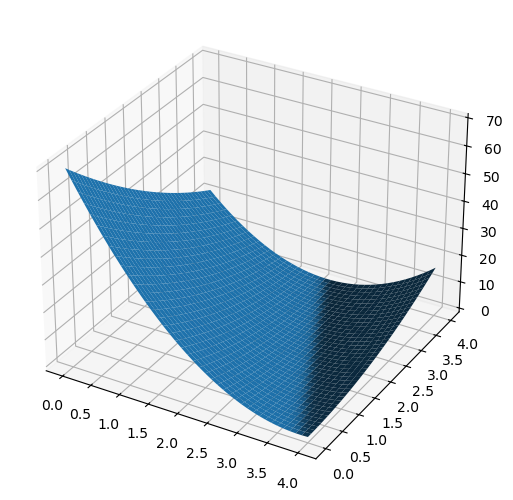

In [59]:
fig = plt.figure()
ax =fig.add_axes(Axes3D(fig))
ax.plot_surface(w, b, l_sum/3)
plt.show()